## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [67]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [68]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [69]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\t'
data = data.replace('\n', split_tag).split(split_tag)
print(len(data))
data

19991


['n00015388_157',
 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'n00015388_373',
 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'n00015388_379',
 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'n00015388_388',
 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'n00015388_442',
 'http://www.porschemania.it/discus/messages/815/102099.jpg',
 'n00015388_474',
 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'n00015388_514',
 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'n00015388_671',
 'http:/

## 將 txt 轉成 pandas dataframe

In [70]:
import pandas as pd

arrange_data = data[1:-1:2]
df = pd.DataFrame(arrange_data)
df.head()

,0
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


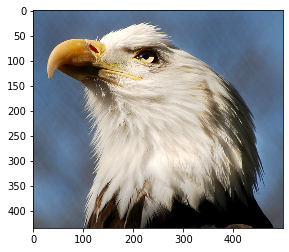

In [71]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df[0][0] #arrange_data[0] #'https://farm1.static.flickr.com/145/430300483_21e993670c.jpg' #df.iloc[0]
print(first_link)

response = requests.get(first_link)

img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()


In [85]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for i in range(len(url_list)):
        response = requests.get(url_list[i])
        img = Image.open(BytesIO(response.content))
        img = np.array(img)
        img_list.append(img)
    return img_list

Total images that we got: 4 


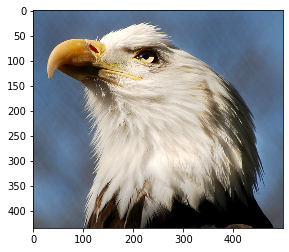

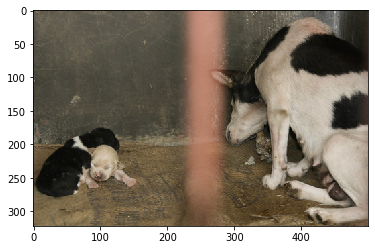

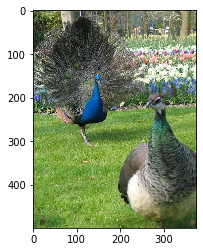

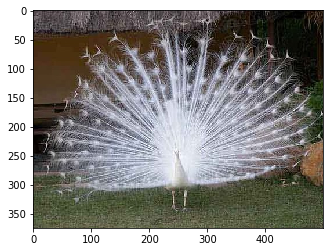

In [86]:
result = img2arr_fromURLs(df[0:4][0].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()